In [1]:
using Distributed
addprocs(8);

In [2]:
using PulseInputDDM

In [3]:
data, μ_rnt, μ_t = load_neural_data(["./data/T103_303075.mat", "./data/T103_304258.mat"]);

In [4]:
ncells, ntrials, nparams = map(x-> x[1].ncells, data), length.(data), 4

([4, 2], [461, 457], 4)

In [5]:
f = [["Softplus" for n in 1:N] for N in ncells]

2-element Vector{Vector{String}}:
 ["Softplus", "Softplus", "Softplus", "Softplus"]
 ["Softplus", "Softplus"]

In [6]:
sum(ncells)

6

In [7]:
nconds, dt, n = 2, 1e-2, 53

(2, 0.01, 53)

In [8]:
output = PulseInputDDM.process_spike_data.(μ_rnt, data; nconds=nconds);

μ_ct = getindex.(output, 1)
σ_ct = getindex.(output, 2);

In [9]:
using PyPlot

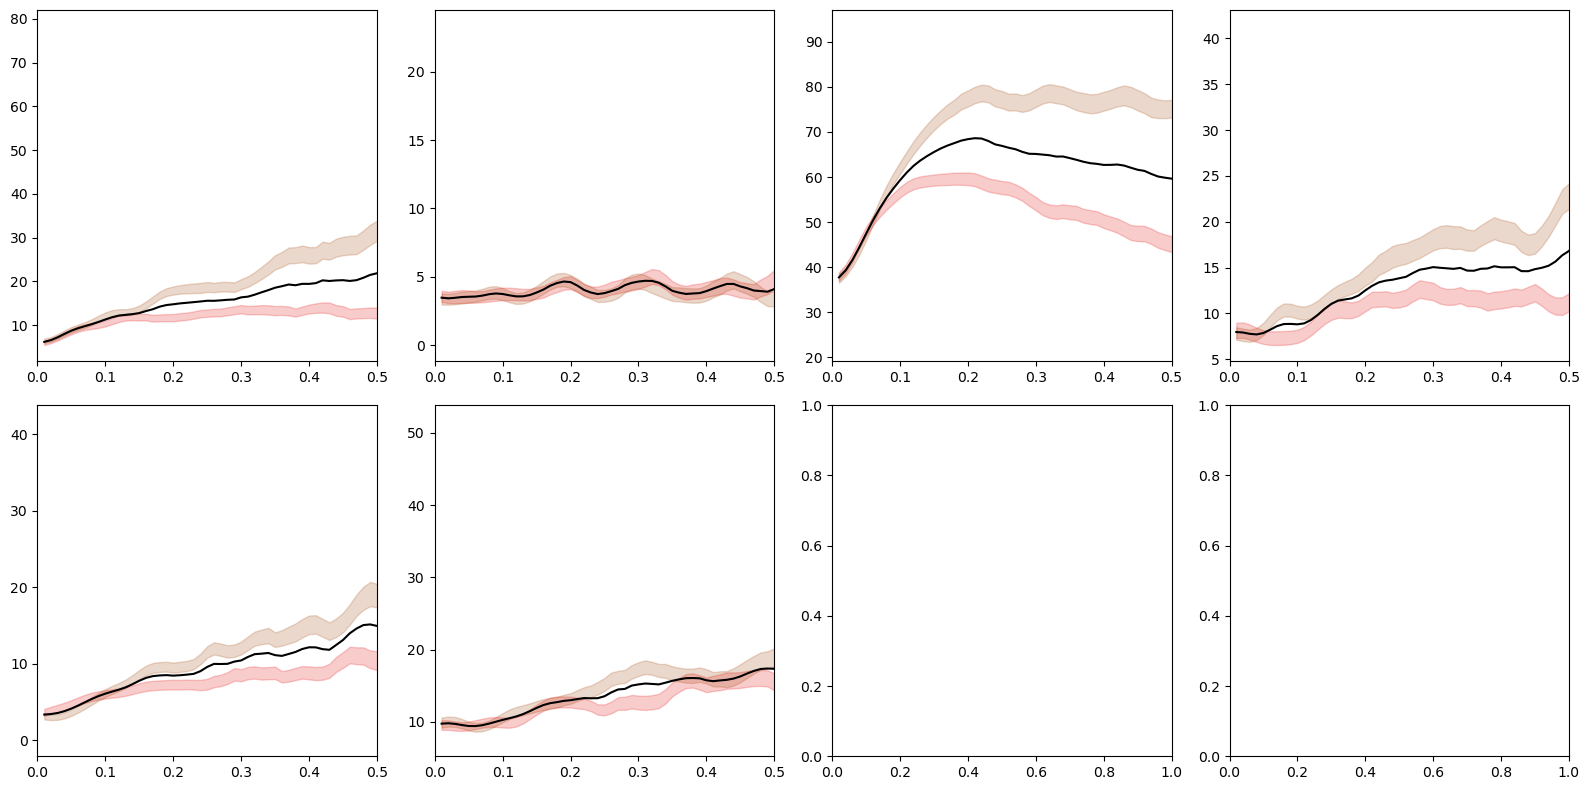

In [10]:
num_rows, num_cols = length(data), maximum(map(x-> x[1].ncells, data))
fig, ax = subplots(num_rows, num_cols, figsize=(4*maximum(map(x-> x[1].ncells, data)), 4*length(data)))
my_colors = ["#E50000","#9F3F00","#5A7F00","#15BF00"]
#PPC colors = ["#1822A0","#5D4A7A","#A37354","#E99C2F"]
#STR colors = ["#A01892","#B85C71","#D0A150","#E9E62F"]

for i in 1:num_rows      
    for j in 1:data[i][1].ncells   
        
        if (num_rows == 1) && (data[i][1].ncells == 1)
        
            for k = 1:nconds   

                ax.fill_between((1:length(μ_ct[i][j][k]))*dt,
                    μ_ct[i][j][k] + σ_ct[i][j][k],
                    μ_ct[i][j][k] - σ_ct[i][j][k],
                    alpha=0.2, color=my_colors[k])                                   

                ax.set_xlim((0, 0.5))

            end   

            ax.plot((1:length(μ_t[i][j]))*dt,
                μ_t[i][j], color="black")
            
            
        elseif (num_rows == 1) && (data[i][1].ncells > 1)
            
            for k = 1:nconds   

                ax[j].fill_between((1:length(μ_ct[i][j][k]))*dt,
                    μ_ct[i][j][k] + σ_ct[i][j][k],
                    μ_ct[i][j][k] - σ_ct[i][j][k],
                    alpha=0.2, color=my_colors[k])                                  

                ax[j].set_xlim((0, 0.5))

            end   

            ax[j].plot((1:length(μ_t[i][j]))*dt,
                μ_t[i][j], color="black")
            
        elseif num_rows > 1
             
            for k = 1:nconds   

                ax[i,j].fill_between((1:length(μ_ct[i][j][k]))*dt,
                    μ_ct[i][j][k] + σ_ct[i][j][k],
                    μ_ct[i][j][k] - σ_ct[i][j][k],
                    alpha=0.2, color=my_colors[k])                                   

                ax[i,j].set_xlim((0, 0.5))

            end   

            ax[i,j].plot((1:length(μ_t[i][j]))*dt,
                μ_t[i][j], color="black")
            
        end

    end
    
end

tight_layout()
display(gcf())

## Fit

In [14]:
f

2-element Vector{Vector{String}}:
 ["Softplus", "Softplus", "Softplus", "Softplus"]
 ["Softplus", "Softplus"]

In [15]:
#θy0 = θy.(data, f) 

In [16]:
model = θy0(data, f)

noiseless_neuralDDM{θneural_noiseless{θz{Float64}, Vector{Vector{Softplus{Float64}}}}}
  θ: θneural_noiseless{θz{Float64}, Vector{Vector{Softplus{Float64}}}}


In [17]:
x0 = vcat([0.1, 20., -0.1, 20., 0.8, 0.8, 0.008], 
    PulseInputDDM.flatten(model.θ)[dimz+1:end]);
options = neural_options(f)  
θ = θneural(x0, f)
model = neuralDDM(θ=θ)

neuralDDM{θneural{θz{Float64}, Vector{Vector{Softplus{Float64}}}}}
  θ: θneural{θz{Float64}, Vector{Vector{Softplus{Float64}}}}
  n: Int64 53
  cross: Bool false


In [18]:
model, = fit(model, data, options)

Fminbox
-------
Initial mu = NaN

Fminbox iteration 1
-------------------
Calling inner optimizer with mu = NaN

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0              NaN              NaN
 * time: 0.014741182327270508

Exiting inner optimizer with x = [0.1, 20.0, -0.1, 20.0, 0.8, 0.8, 0.008, 0.6541800551193103, -0.05534687800542647, 1.112095563049958, 0.27663694371409514, 0.33735111547667945, 0.11373838040093942]
Current distance to box: 0.003
Decreasing barrier term μ.



(neuralDDM{θneural{θz{Float64}, Vector{Vector{Softplus{Float64}}}}}
  θ: θneural{θz{Float64}, Vector{Vector{Softplus{Float64}}}}
  n: Int64 53
  cross: Bool false
,  * Status: failure

 * Candidate solution
    Final objective value:     7.111119e+04

 * Found with
    Algorithm:     Fminbox with BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 1.0e-10
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 1.0e-09
    |g(x)|                 = NaN ≰ 1.0e-03

 * Work counters
    Seconds run:   12  (vs limit 170000)
    Iterations:    1
    f(x) calls:    1
    ∇f(x) calls:   1
)

In [58]:
θy0 = θy.(data, f) 

MethodError: MethodError: no method matching θy(::Vector{neuraldata}, ::String)

Closest candidates are:
  θy(::Any, ::Any, !Matched::Any, !Matched::Any; nconds)
   @ PulseInputDDM ~/Documents/GitHub/PulseInputDDM.jl/src/neural_model/noiseless_model.jl:215
  θy(::Any, !Matched::Vector{String})
   @ PulseInputDDM ~/Documents/GitHub/PulseInputDDM.jl/src/neural_model/noiseless_model.jl:202
  θy(::T1) where T1
   @ PulseInputDDM ~/.julia/packages/Parameters/MK0O4/src/Parameters.jl:525


In [57]:
θy0 = vcat(vcat(initialize_θy.(data, f)...)...);

UndefVarError: UndefVarError: `initialize_θy` not defined

In [54]:
options0 = neuraloptions(ncells=ncells,
    fit=vcat(falses(dimz), trues(sum(ncells)*nparams)),
    x0=vcat([0., 30., 0. + eps(), 0., 0., 1. - eps(), 0.008], θy0))

neuraloptions
  ncells: Array{Int64}((20,)) [2, 2, 2, 2, 1, 1, 1, 2, 6, 7, 2, 3, 3, 3, 5, 1, 1, 1, 1, 2]
  nparams: Int64 4
  f: String "Sigmoid"
  fit: Array{Bool}((199,)) Bool[0, 0, 0, 0, 0, 0, 0, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  lb: Array{Float64}((199,)) [0.0, 8.0, -5.0, 0.0, 0.0, 0.01, 0.005, -100.0, 0.0, -10.0  …  -10.0, -10.0, -100.0, 0.0, -10.0, -10.0, -100.0, 0.0, -10.0, -10.0]
  ub: Array{Float64}((199,)) [30.0, 32.0, 5.0, 200.0, 5.0, 1.2, 1.0, 100.0, 100.0, 10.0  …  10.0, 10.0, 100.0, 100.0, 10.0, 10.0, 100.0, 100.0, 10.0, 10.0]
  x0: Array{Float64}((199,)) [0.0, 30.0, 2.220446049250313e-16, 0.0, 0.0, 0.9999999999999998, 0.008, 3.4129692832764507, 7.096956757984741, 0.0007251110656321122  …  -0.0007156635206620532, 0.0, 1.0869565217391304, 7.518384724551671, -0.0007797390915313823, 0.0, 4.154302670623145, 2.3674364598116373, 0.00024397527487685802, 0.0]


In [55]:
model, = optimize(data, options0; show_trace=false)

optimization complete. converged: true 



(neuralDDM{θneural{θz{Float64},Array{Array{Sigmoid{Float64},1},1}},Array{Array{neuraldata,1},1}}
  θ: θneural{θz{Float64},Array{Array{Sigmoid{Float64},1},1}}
  data: Array{Array{neuraldata,1}}((20,))
,  * Status: success

 * Candidate solution
    Minimizer: [-8.38e-01, 7.34e+00, 6.88e-04,  ...]
    Minimum:   4.640202e+05

 * Found with
    Algorithm:     Fminbox with BFGS
    Initial Point: [3.41e+00, 7.10e+00, 7.25e-04,  ...]

 * Convergence measures
    |x - x'|               = 1.09e-01 ≰ 1.0e-10
    |x - x'|/|x'|          = 8.78e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.23e-01 ≰ 1.0e-06
    |f(x) - f(x')|/|f(x')| = 6.97e-07 ≰ 0.0e+00
    |g(x)|                 = 1.27e+00 ≰ 1.0e-03

 * Work counters
    Seconds run:   929  (vs limit Inf)
    Iterations:    2
    f(x) calls:    275
    ∇f(x) calls:   65
)

In [56]:
model.θ.θy

20-element Array{Array{Sigmoid{Float64},1},1}:
 [Sigmoid{Float64}
  a: Float64 -0.8379777560547127
  b: Float64 7.3382733116557795
  c: Float64 0.0006879546720474932
  d: Float64 -1.9560803162197098
, Sigmoid{Float64}
  a: Float64 -1.1414000322095983
  b: Float64 8.876274485488986
  c: Float64 0.0017675082674157943
  d: Float64 -1.8345781403335286
]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [57]:
fit=vcat(falses(1), trues(dimz-1), trues(sum(ncells)*nparams))
#x0=vcat([0.1, 12., -2., 10., 0.1, 0.8, 0.008], θy0);
x0=vcat([0.1, 12., -2., 10., 0.1, 0.8, 0.008], pulse_input_DDM.flatten(model.θ)[dimz+1:end]);

In [58]:
options = neuraloptions(ncells=ncells, x0=x0, fit=fit, nparams=nparams, f=f);

In [ ]:
model, = optimize(data, options, n);

Fminbox
-------
Initial mu = 0.0268523

Fminbox iteration 1
-------------------
Calling inner optimizer with mu = 0.0268523

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     4.639606e+05     1.221887e+03
 * time: 6.699562072753906e-5
     1     4.638768e+05     1.190302e+03
 * time: 153.85758686065674
     2     4.638702e+05     1.190056e+03
 * time: 303.50129294395447
     3     4.638616e+05     3.278224e+03
 * time: 455.6839029788971
     4     4.635538e+05     1.377969e+03
 * time: 606.3410198688507
     5     4.635498e+05     1.372751e+03
 * time: 759.3251039981842
     6     4.635476e+05     1.375147e+03
 * time: 912.3200459480286
     7     4.635465e+05     1.367911e+03
 * time: 1062.8351318836212
     8     4.635195e+05     1.144083e+03
 * time: 1215.0964498519897
     9     4.635072e+05     1.319406e+03
 * time: 1367.1213610172272
    10     4.634984e+05     7.688150e+03
 * time: 1517.9673838615417
    11     4.634959e+05     2.04

   117     4.585905e+05     8.503747e+06
 * time: 16579.165876865387
   118     4.585897e+05     8.450578e+06
 * time: 16717.277804851532
   119     4.585806e+05     9.328899e+06
 * time: 16855.10165786743
   120     4.585773e+05     1.126801e+07
 * time: 16995.698507785797
   121     4.585731e+05     2.421255e+07
 * time: 17134.276610851288
   122     4.585674e+05     5.329762e+06
 * time: 17272.68687391281
   123     4.585642e+05     4.007943e+06
 * time: 17410.61642885208
   124     4.585617e+05     3.870757e+06
 * time: 17549.530761003494
   125     4.585556e+05     2.939120e+06
 * time: 17688.11088681221
   126     4.585518e+05     2.527865e+06
 * time: 17825.68637895584
   127     4.585508e+05     2.484978e+06
 * time: 17963.62508583069
   128     4.585461e+05     2.200709e+06
 * time: 18101.97358083725
   129     4.585405e+05     2.039618e+06
 * time: 18240.52695584297
   130     4.585352e+05     1.422643e+06
 * time: 18378.971626996994
   131     4.585315e+05     1.352177e+06
 

   239     4.575473e+05     5.584718e+02
 * time: 36023.81767487526
   240     4.575206e+05     7.300768e+02
 * time: 36321.00775384903
   241     4.574912e+05     8.886432e+02
 * time: 36618.496359825134
   242     4.574595e+05     6.562555e+02
 * time: 36839.84094595909
   243     4.574295e+05     5.516112e+02
 * time: 37059.94116687775
   244     4.573993e+05     4.599088e+02
 * time: 37280.79974889755
   245     4.573794e+05     5.349676e+02
 * time: 37502.41055083275
   246     4.573735e+05     5.072578e+02
 * time: 37722.98889088631
   247     4.573709e+05     4.908424e+02
 * time: 37944.12100601196
   248     4.573649e+05     5.354232e+02
 * time: 38165.27172589302
   249     4.573515e+05     5.123845e+02
 * time: 38312.546553850174
   250     4.573194e+05     4.959256e+02
 * time: 38536.41821885109
   251     4.573171e+05     4.871172e+02
 * time: 38683.23852491379
   252     4.573059e+05     4.899360e+02
 * time: 38903.99959683418
   253     4.573025e+05     4.835458e+02
 * ti

   360     4.559671e+05     1.398991e+02
 * time: 57382.92438387871
   361     4.559666e+05     1.451857e+02
 * time: 57533.79836297035
   362     4.559630e+05     1.809774e+02
 * time: 57684.37147688866
   363     4.559594e+05     7.649465e+03
 * time: 57834.986166000366
   364     4.559591e+05     1.587025e+02
 * time: 58136.27327299118
   365     4.559566e+05     2.569740e+02
 * time: 58288.82621383667
   366     4.559535e+05     3.247108e+02
 * time: 58439.84732699394
   367     4.559520e+05     3.347070e+02
 * time: 58591.035171985626
   368     4.559480e+05     2.504476e+02
 * time: 58742.333189964294
   369     4.559456e+05     1.624918e+02
 * time: 58968.46670794487
   370     4.559431e+05     1.135626e+02
 * time: 59119.586186885834
   371     4.559417e+05     7.426640e+01
 * time: 59271.681461811066
   372     4.559409e+05     7.387127e+01
 * time: 59423.41295480728
   373     4.559404e+05     8.134305e+01
 * time: 59574.694839954376
   374     4.559390e+05     1.109505e+02
 

In [ ]:
model.θ.θz

In [ ]:
model.θ.θy

## Model fit

In [ ]:
LL_ML = loglikelihood(model.θ, data, n)

In [106]:
LL_null = mapreduce((data,θy)-> mapreduce(data-> mapreduce(n->
    pulse_input_DDM.neural_null(data.spikes[n], θy[n]([0.], data.input_data.λ0[n]), dt),
        +, 1:data.ncells), +, data), +, data, model.θ.θy)

-319759.9091203376

In [107]:
LL_ML - LL_null

3940.2461070501013

## Sample rates

In [231]:
μ_λ, μ_c_λ = pulse_input_DDM.synthetic_λ(model.θ, data; num_samples=100, nconds=nconds);

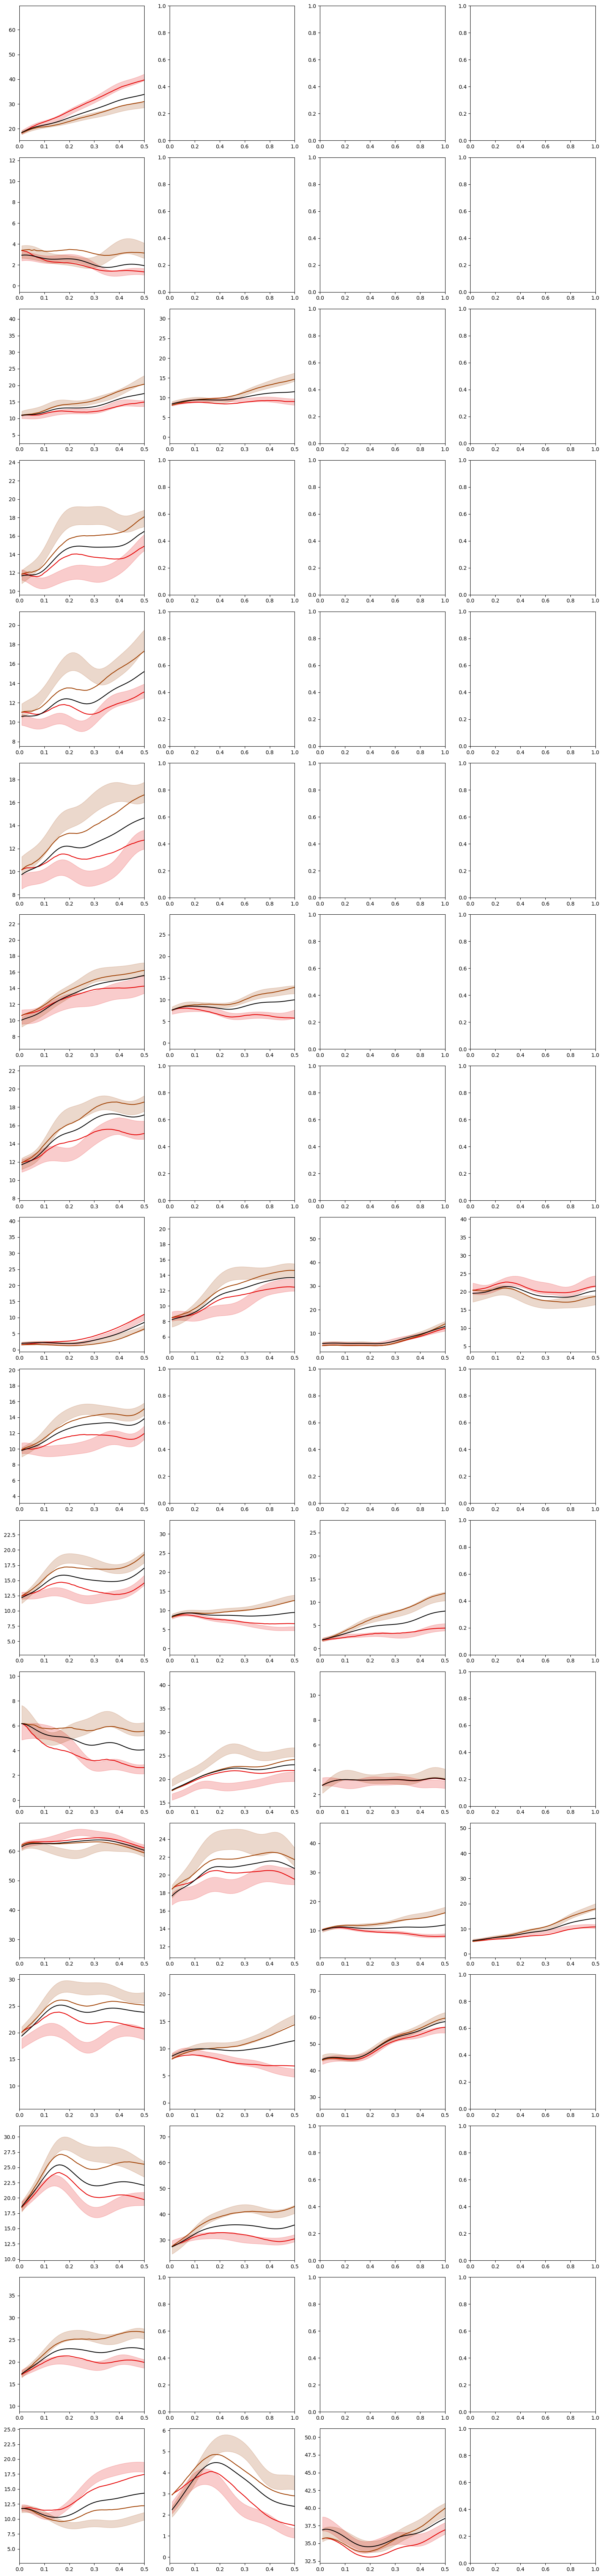

In [240]:
num_rows, num_cols = length(data), maximum(map(x-> x[1].ncells, data))
fig, ax = subplots(num_rows, num_cols, figsize=(4*maximum(map(x-> x[1].ncells, data)), 4*length(data)))
my_colors = ["#E50000","#9F3F00","#5A7F00","#15BF00"]
#PPC colors = ["#1822A0","#5D4A7A","#A37354","#E99C2F"]
#STR colors = ["#A01892","#B85C71","#D0A150","#E9E62F"]

for i in 1:num_rows      
    for j in 1:data[i][1].ncells   
        
        if (num_rows == 1) && (data[i][1].ncells == 1)
        
            for k = 1:nconds   

                ax.fill_between((1:length(μ_ct[i][j][k]))*dt,
                    μ_ct[i][j][k] + σ_ct[i][j][k],
                    μ_ct[i][j][k] - σ_ct[i][j][k],
                    alpha=0.2, color=my_colors[k]) 
                
                ax.plot((1:length(μ_c_λ[i][j][k]))*dt,
                    μ_c_λ[i][j][k], color=my_colors[k])  

                ax.set_xlim((0, 0.5))

            end   

            ax.plot((1:length(μ_t[i][j]))*dt,
                μ_t[i][j], color="black")
            
            
        elseif (num_rows == 1) && (data[i][1].ncells > 1)
            
            for k = 1:nconds   

                ax[j].fill_between((1:length(μ_ct[i][j][k]))*dt,
                    μ_ct[i][j][k] + σ_ct[i][j][k],
                    μ_ct[i][j][k] - σ_ct[i][j][k],
                    alpha=0.2, color=my_colors[k])  
                
                ax[j].plot((1:length(μ_c_λ[i][j][k]))*dt,
                    μ_c_λ[i][j][k], color=my_colors[k])  

                ax[j].set_xlim((0, 0.5))

            end   

            ax[j].plot((1:length(μ_t[i][j]))*dt,
                μ_t[i][j], color="black")
            
        elseif num_rows > 1
             
            for k = 1:nconds   

                ax[i,j].fill_between((1:length(μ_ct[i][j][k]))*dt,
                    μ_ct[i][j][k] + σ_ct[i][j][k],
                    μ_ct[i][j][k] - σ_ct[i][j][k],
                    alpha=0.2, color=my_colors[k]) 
                
                ax[i,j].plot((1:length(μ_c_λ[i][j][k]))*dt,
                    μ_c_λ[i][j][k], color=my_colors[k])  

                ax[i,j].set_xlim((0, 0.5))

            end   

            ax[i,j].plot((1:length(μ_t[i][j]))*dt,
                μ_t[i][j], color="black")
            
        end

    end
    
end

tight_layout()
PyPlot.savefig(ENV["HOME"]*"/Projects/pulse_input_DDM/examples/bdd_work/figures/"*rat*"PSTH.png")